# Exploration of the data

## Imports

In [23]:
from utils import *
import matplotlib.pyplot as plt
import pandas as pd

## Load the datasets

In [24]:
path_to_ml_latest_small = 'ml-latest-small/'
dataset = load_dataset_from_source(path_to_ml_latest_small)

movies = dataset["movies.csv"]
ratings = dataset["ratings.csv"]
links = dataset["links.csv"]
tags = dataset["tags.csv"]

## Visualize the datasets

In [25]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                   Adventure|Children|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                       Comedy  1995

In [26]:
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [27]:
links.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [28]:
tags.head()

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

The `links` dataset is not giving any meaningful information for the sake of this exploration so we can discard it.

## Functions from utils

In [29]:
ratings = dataset["ratings.csv"]
ratings_train, ratings_val = split_users(ratings, 5)
assert ratings_val.shape == (3050, 4)

#number of unique users
print("There are {} unique users.\n".format(len(ratings['userId'].unique())))

#the most frequently watched genres historically
most_watched_film = ratings['movieId'].value_counts().index.tolist()
#the first 5
print("The first 5 ranked/whatched genres of movies are:\n") 
for i in range(5):
    s = movies[movies['movieId']== most_watched_film[i]]
    print(s['genres'].values[0])

There are 610 unique users.

The first 5 ranked/whatched genres of movies are:

Comedy|Drama|Romance|War
Crime|Drama
Comedy|Crime|Drama|Thriller
Crime|Horror|Thriller
Action|Sci-Fi|Thriller


## Further exploration

In [30]:
print("The datasets contain {} movies.".format(len(movies['title'].unique())))
print("There are {} different genres.".format(len(movies['genres'].unique())))
print("There are {} different tags.".format(len(tags['tag'].unique())))

top_10_tags = tags['tag'].value_counts().head(10)
print("\nThe 10 most popular tags and their frequency are:")
print(top_10_tags)
top_10_users = ratings['userId'].value_counts().head(10)
user_stats = []

print("\nThe top 10 users with the most ratings and their frequency are:")
for user_id in top_10_users.index:
    user_ratings = ratings[ratings['userId'] == user_id]['rating']
    user_stats.append({
        'userId': user_id,
        'num_ratings': user_ratings.count(),
        'max_rating': user_ratings.max(),
        'min_rating': user_ratings.min(),
        'average_rating': user_ratings.mean()
    })

user_stats_df = pd.DataFrame(user_stats)
user_stats_df

The datasets contain 9737 movies.
There are 951 different genres.
There are 1589 different tags.

The 10 most popular tags and their frequency are:
tag
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
surreal               23
Disney                23
religion              22
sci-fi                21
quirky                21
Name: count, dtype: int64

The top 10 users with the most ratings and their frequency are:


userId  num_ratings  max_rating  min_rating  average_rating
0     414         2698         5.0         0.5        3.391957
1     599         2478         5.0         0.5        2.642050
2     474         2108         5.0         0.5        3.398956
3     448         1864         5.0         0.5        2.847371
4     274         1346         5.0         0.5        3.235884
5     610         1302         5.0         0.5        3.688556
6      68         1260         5.0         0.5        3.233730
7     380         1218         5.0         0.5        3.673235
8     606         1115         5.0         0.5        3.657399
9     288         1055         5.0         1.0        3.145972

### Distribution of ratings

In [41]:
unique_ratings = sorted(ratings["rating"].unique())
bins = [x - 0.25 for x in unique_ratings] + [unique_ratings[-1] + 0.25]  # Adjust bin edges to align with unique ratings

plt.figure(figsize=(6, 6))
plt.hist(ratings["rating"], bins=bins, color='orange', edgecolor='black', alpha=0.8)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(unique_ratings)  # Ensure ticks match the unique ratings
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("res/ratings_distribution.png")
plt.show()

lowest_rating = ratings["rating"].min()
highest_rating = ratings["rating"].max()
average_rating = ratings["rating"].mean()
median_rating = ratings["rating"].median()

print(f"Lowest rating: {lowest_rating}/5.0.")
print(f"Highest rating: {highest_rating}/5.0.")
print(f"Average rating: {round(average_rating,1)}/5.0.")
print(f"Median rating: {median_rating}/5.0.")


Lowest rating: 0.5/5.0.
Highest rating: 5.0/5.0.
Average rating: 3.5/5.0.
Median rating: 3.5/5.0.


### User number of ratings distribution

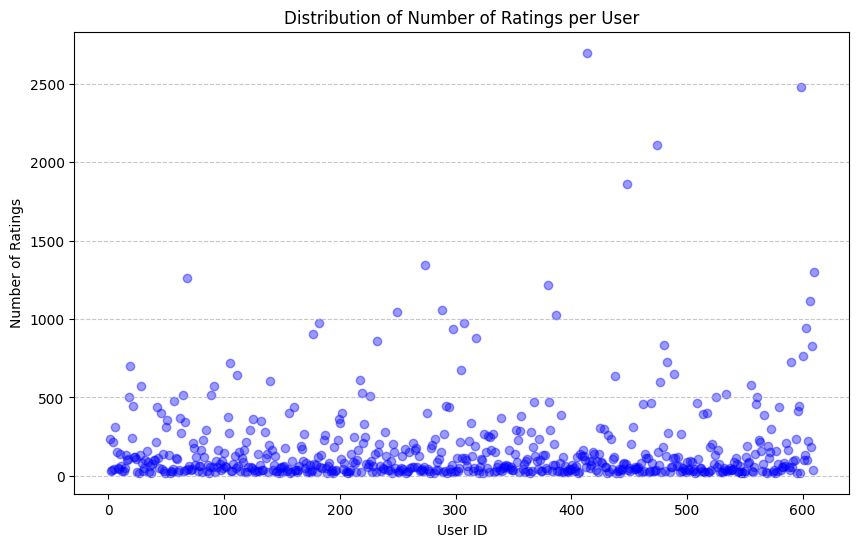

Minimum number of ratings per user: 20
Maximum number of ratings per user: 2698
Average number of ratings per user: 165.30
Median number of ratings per user: 70.5


In [40]:
user_rating_counts = ratings['userId'].value_counts()
plt.figure(figsize=(10, 6))
plt.scatter(user_rating_counts.index, user_rating_counts.values, color='blue', alpha=0.4)
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("res/user_ratings_distribution.png")
plt.show()

min_ratings = user_rating_counts.min()
max_ratings = user_rating_counts.max()
average_ratings = user_rating_counts.mean()
median_ratings = user_rating_counts.median()

print(f"Minimum number of ratings per user: {min_ratings}")
print(f"Maximum number of ratings per user: {max_ratings}")
print(f"Average number of ratings per user: {average_ratings:.2f}")
print(f"Median number of ratings per user: {median_ratings}")



### Best rated movies

In [12]:
# Calculate the weighted average rating for each movie
movie_rating_counts = ratings.groupby('movieId')['rating'].count()
weighted_average_movie_ratings = (ratings.groupby('movieId')['rating'].sum() / movie_rating_counts).sort_values(ascending=False)

# Filter out movies with less than a certain number of ratings (e.g., 10)
min_ratings_count = 10
filtered_weighted_average_movie_ratings = weighted_average_movie_ratings[movie_rating_counts >= min_ratings_count]

# Get the top 10 best-rated movies
top_10_best_rated_movies = filtered_weighted_average_movie_ratings.head(10).reset_index().merge(movies[['movieId', 'title']], on='movieId')

top_10_best_rated_movies

movieId    rating                                  title
0     1041  4.590909                  Secrets & Lies (1996)
1     3451  4.545455    Guess Who's Coming to Dinner (1967)
2     1178  4.541667                  Paths of Glory (1957)
3     1104  4.475000       Streetcar Named Desire, A (1951)
4     2360  4.458333       Celebration, The (Festen) (1998)
5     1217  4.433333                             Ran (1985)
6      318  4.429022       Shawshank Redemption, The (1994)
7      951  4.392857                 His Girl Friday (1940)
8     1927  4.350000  All Quiet on the Western Front (1930)
9     3468  4.333333                    Hustler, The (1961)

### Top 10 most popular movies

In [22]:
top_10_most_rated_movies = movie_rating_counts.head(10).reset_index().merge(movies[['movieId', 'title']], on='movieId')
top_10_most_rated_movies = top_10_most_rated_movies.sort_values(by='rating', ascending=False)
top_10_most_rated_movies = top_10_most_rated_movies.rename(columns={'rating': 'ratings'})
top_10_most_rated_movies

movieId  ratings                               title
0        1      215                    Toy Story (1995)
9       10      132                    GoldenEye (1995)
1        2      110                      Jumanji (1995)
5        6      102                         Heat (1995)
6        7       54                      Sabrina (1995)
2        3       52             Grumpier Old Men (1995)
4        5       49  Father of the Bride Part II (1995)
8        9       16                 Sudden Death (1995)
7        8        8                 Tom and Huck (1995)
3        4        7            Waiting to Exhale (1995)

### Best rated movies for the 10 most popular genres

In [42]:
most_popular_genres = []
for i in range(10):
    s = movies[movies['movieId'] == most_watched_film[i]]
    genre = s['genres'].values[0]
    most_popular_genres.append(genre)

filtered_movies = movies[movies['genres'].isin(most_popular_genres)]
filtered_movie_ratings = filtered_movies.merge(weighted_average_movie_ratings, on='movieId')

best_rated_movies = {}
for genre in most_popular_genres:
    genre_movies = filtered_movie_ratings[filtered_movie_ratings['genres'] == genre]
    best_rated_movie = genre_movies.loc[genre_movies['rating'].idxmax()]
    best_rated_movies[genre] = best_rated_movie

best_rated_movies_df = pd.DataFrame(best_rated_movies).T
best_rated_movies_df[['title', 'rating']]

title  \
Comedy|Drama|Romance|War                        Train of Life (Train de vie) (1998)   
Crime|Drama                                                   Brother (Brat) (1997)   
Comedy|Crime|Drama|Thriller       Man Bites Dog (C'est arrivé près de chez vous)...   
Crime|Horror|Thriller                                                   Cure (1997)   
Action|Sci-Fi|Thriller                                             Hangar 18 (1980)   
Action|Adventure|Sci-Fi                   Star Wars: Episode IV - A New Hope (1977)   
Action|Adventure|Sci-Fi|Thriller               Road Warrior, The (Mad Max 2) (1981)   
Action|Drama|War                                                   Max Manus (2008)   
Action|Sci-Fi                                                        Nirvana (1997)   
Drama|War                                                           Mephisto (1981)   

                                    rating  
Comedy|Drama|Romance|War               4.5  
Crime|Drama                            5.0  
Comedy|Crime|Drama|Thriller            4.5  
Crime|Horror|Thriller                  4.5  
Action|Sci-Fi|Thriller                 4.5  
Action|Adventure|Sci-Fi           4.231076  
Action|Adventure|Sci-Fi|Thriller    4.0375  
Action|Drama|War                       5.0  
Action|Sci-Fi                          4.5  
Drama|War                              5.0